In [2]:
# imports/config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#plt.rcParams['figure.figsize'] = [20, 10]

In [3]:
# calculate differences between browser and os data
def get_keydown_time_differences(browser) -> tuple[list, list]:
    diffs_manual = [] 
    diffs_machine = []
    for i in range(0, len(browser), 2):
        assert browser['type'].loc[i + 1] == 'keyup' and browser['type'].loc[i] == 'keydown'

        hold_time_browser_natural =  abs(browser['browser_natural'].loc[i + 1] - browser['browser_natural'].loc[i]) * 1000
        hold_time_os_natural =  abs(browser['os_natural'].loc[i + 1] - browser['os_natural'].loc[i]) * 1000

        hold_time_browser_machine =  abs(browser['browser_machine'].loc[i + 1] - browser['browser_machine'].loc[i]) * 1000
        hold_time_os_machine =  abs(browser['os_machine'].loc[i + 1] - browser['os_machine'].loc[i]) * 1000

        diffs_manual.append(abs(hold_time_browser_natural - hold_time_os_natural))
        diffs_machine.append(abs(hold_time_browser_machine - hold_time_os_machine))

    assert len(diffs_manual) == len(diffs_machine) == (len(browser) / 2)

    return (diffs_manual, diffs_machine)



In [4]:
def calc(data: tuple[list, list]):
    manual = data[0]
    machine = data[1]

    print("Manual")
    print("Min: ", round(min(manual),1) )
    print("Max: ", round(max(manual),1))
    print("Mean:", round(sum(manual) / len(manual),1))
    print("STD: ", round(np.std(manual),1))

    print("Machine")
    print("Min: ", round(min(machine),1))
    print("Max: ", round(max(machine),1))
    print("Mean:", round(sum(machine) / len(machine),1))
    print("STD: ", round(np.std(machine),1))

Manual
Min:  0.0
Max:  1.2
Mean: 0.3
STD:  0.2
Machine
Min:  0.0
Max:  1.6
Mean: 0.3
STD:  0.2


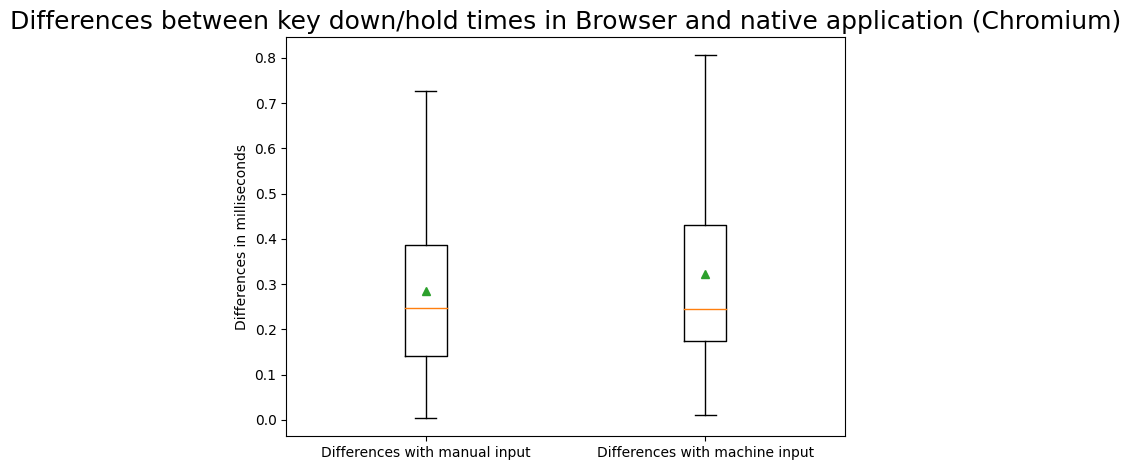

In [5]:
# chromium
chromium = pd.read_csv("./chromium/complete.csv")
chromium_diffs = get_keydown_time_differences(chromium)
calc(chromium_diffs)
chromium_diffs_manual = chromium_diffs[0]
chromium_diffs_machine = chromium_diffs[1]


# plot chromium
plt.boxplot([chromium_diffs_manual, chromium_diffs_machine], labels=["Differences with manual input",
            "Differences with machine input"], showfliers=False, showmeans=True)
plt.title("Differences between key down/hold times in Browser and native application (Chromium)", fontsize=18)
#plt.xticks(fontsize=18)
plt.xlabel("", )#fontsize=18)
plt.ylabel("Differences in milliseconds", )#fontsize=18)
plt.tight_layout()
plt.savefig("./chromium/fig_holdtime.jpeg", bbox_inches="tight", pad_inches=0.3)
plt.show()

Manual
Min:  0.0
Max:  0.9
Mean: 0.3
STD:  0.2
Machine
Min:  0.0
Max:  1.2
Mean: 0.5
STD:  0.3


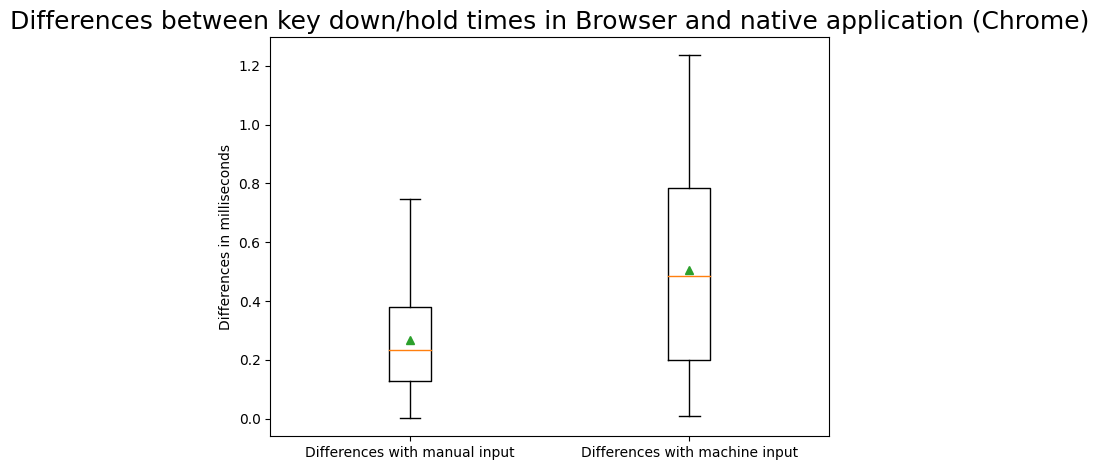

In [6]:
# chrome
chrome = pd.read_csv("./chrome/complete.csv")
chrome_diffs = get_keydown_time_differences(chrome)
calc(chrome_diffs)
chrome_diffs_manual = chrome_diffs[0]
chrome_diffs_machine = chrome_diffs[1]

# plot chrome
plt.boxplot([chrome_diffs_manual, chrome_diffs_machine], labels=["Differences with manual input",
            "Differences with machine input"], showfliers=False, showmeans=True)
plt.title("Differences between key down/hold times in Browser and native application (Chrome)", fontsize=18)
#plt.xticks(fontsize=18)
plt.xlabel("", )#fontsize=18)
plt.ylabel("Differences in milliseconds", )#fontsize=18)
plt.tight_layout()
plt.savefig("./chrome/fig_holdtime.jpeg", bbox_inches="tight", pad_inches=0.3)
plt.show()

Manual
Min:  0.0
Max:  1.0
Mean: 0.3
STD:  0.2
Machine
Min:  0.0
Max:  1.0
Mean: 0.4
STD:  0.2


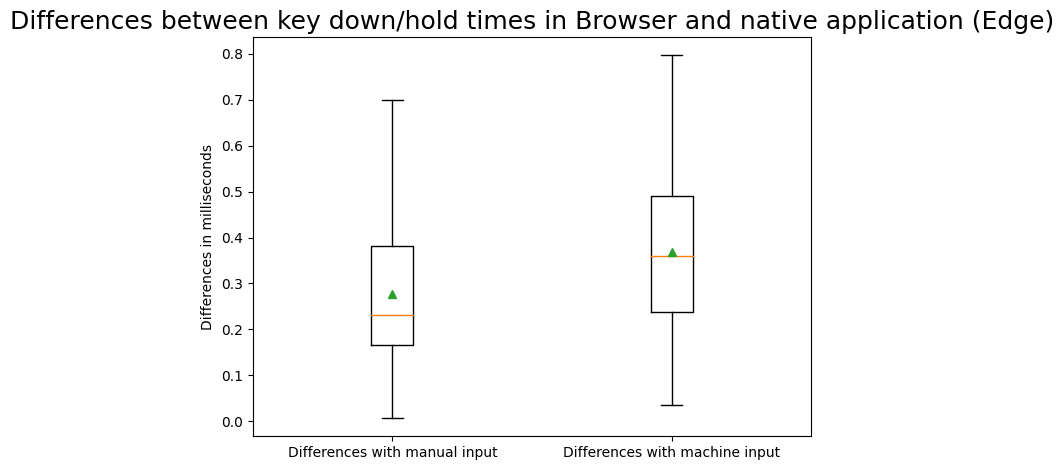

In [7]:
# edge
edge = pd.read_csv("./edge/complete.csv")
edge_diffs = get_keydown_time_differences(edge)
calc(edge_diffs)
edge_diffs_manual = edge_diffs[0]
edge_diffs_machine = edge_diffs[1]


# plot edge
plt.boxplot([edge_diffs_manual, edge_diffs_machine], labels=["Differences with manual input",
            "Differences with machine input"], showfliers=False, showmeans=True)
plt.title("Differences between key down/hold times in Browser and native application (Edge)", fontsize=18)
#plt.xticks(fontsize=18)
plt.xlabel("", )#fontsize=18)
plt.ylabel("Differences in milliseconds", )#fontsize=18)
plt.tight_layout()
plt.savefig("./edge/fig_holdtime.jpeg", bbox_inches="tight", pad_inches=0.3)
plt.show()

Manual
Min:  0.0
Max:  1.2
Mean: 0.3
STD:  0.2
Machine
Min:  0.0
Max:  1.4
Mean: 0.5
STD:  0.3


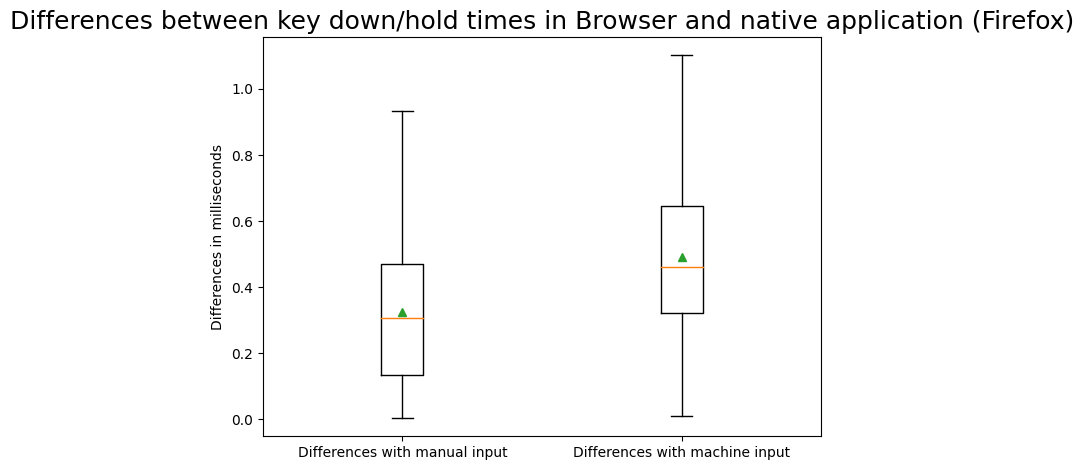

In [8]:
# firefox
firefox = pd.read_csv("./firefox/complete.csv")
firefox_diffs = get_keydown_time_differences(firefox)
calc(firefox_diffs)
firefox_diffs_manual = firefox_diffs[0]
firefox_diffs_machine = firefox_diffs[1]

# plot firefox
plt.boxplot([firefox_diffs_manual, firefox_diffs_machine] , labels=["Differences with manual input",
            "Differences with machine input"], showfliers=False, showmeans=True)
plt.title("Differences between key down/hold times in Browser and native application (Firefox)", fontsize=18)
#plt.xticks(fontsize=18)
plt.xlabel("", )#fontsize=18)
plt.ylabel("Differences in milliseconds", )#fontsize=18)
plt.tight_layout()
plt.savefig("./firefox/fig_holdtime.jpeg", bbox_inches="tight", pad_inches=0.3)
plt.show()

Manual
Min:  0.0
Max:  19.8
Mean: 7.8
STD:  5.5
Machine
Min:  0.1
Max:  22.5
Mean: 8.1
STD:  5.8


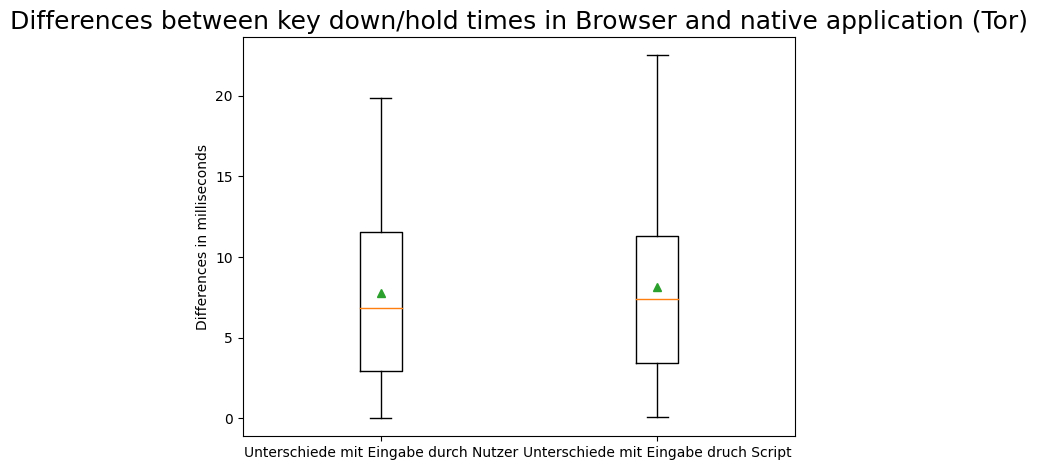

In [9]:
# tor
tor = pd.read_csv("./tor/complete.csv")
tor_diffs = get_keydown_time_differences(tor)
calc(tor_diffs)
tor_diffs_manual = tor_diffs[0]
tor_diffs_machine = tor_diffs[1]


# plot tor
plt.boxplot(
    [
    tor_diffs_manual, tor_diffs_machine
], labels=[
    "Unterschiede mit Eingabe durch Nutzer",      
    "Unterschiede mit Eingabe druch Script",
], showfliers=False, showmeans=True)
plt.title("Differences between key down/hold times in Browser and native application (Tor)", fontsize=18)
#plt.xticks(fontsize=18)
plt.xlabel("", )#fontsize=18)
plt.ylabel("Differences in milliseconds", )#fontsize=18)
plt.tight_layout()
plt.savefig("./tor/fig_holdtime.jpeg", bbox_inches="tight", pad_inches=0.3)
plt.show()

Text(0, 0.5, 'Differences in milliseconds')

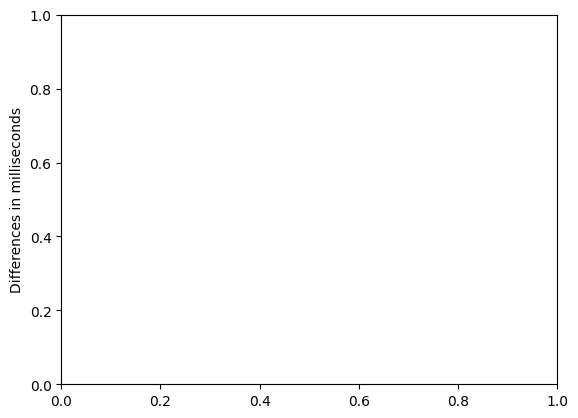

In [10]:
# safari2 
safari2 = pd.read_csv("./safari2/complete.csv")
safari2_diffs = get_keydown_time_differences(safari2)
#calc(safari2_diffs)
safari2_diffs_manual = safari2_diffs[0]
safari2_diffs_machine = safari2_diffs[1]


# plot safari2
#plt.boxplot([safari2_diffs_manual, safari2_diffs_machine], labels=["Differences with manual input",
#            "Differences with machine input"], showfliers=False, showmeans=True)
#plt.title("Differences between key down/hold times in Browser and native application (Safari 2)", fontsize=18)
#plt.xticks(fontsize=18)
plt.xlabel("", )#fontsize=18)
plt.ylabel("Differences in milliseconds", )#fontsize=18)
#plt.tight_layout()
#plt.savefig("./safari2/fig.jpeg", bbox_inches="tight", pad_inches=0.3)
#plt.show()

Manual
Min:  0.0
Max:  2.2
Mean: 0.8
STD:  0.5
Machine
Min:  0.0
Max:  3.0
Mean: 1.5
STD:  0.8


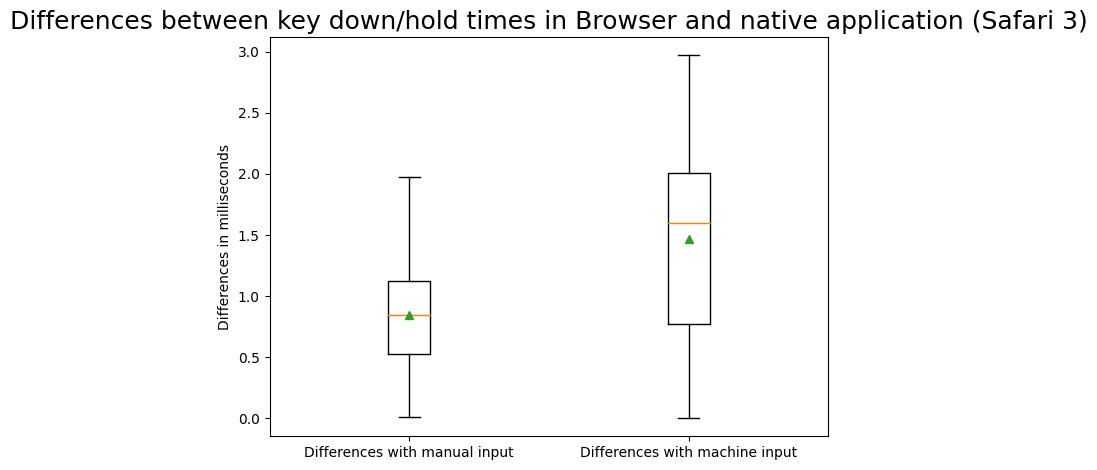

In [11]:
# safari3 
safari3 = pd.read_csv("./safari3/complete.csv")
safari3_diffs = get_keydown_time_differences(safari3)
calc(safari3_diffs)
safari3_diffs_manual = safari3_diffs[0]
safari3_diffs_machine = safari3_diffs[1]


# plot safari2
plt.boxplot([safari3_diffs_manual, safari3_diffs_machine], labels=["Differences with manual input",
            "Differences with machine input"], showfliers=False, showmeans=True)
plt.title("Differences between key down/hold times in Browser and native application (Safari 3)", fontsize=18)
#plt.xticks(fontsize=18)
plt.xlabel("", )#fontsize=18)
plt.ylabel("Differences in milliseconds", )#fontsize=18)
plt.tight_layout()
plt.savefig("./safari3/fig.jpeg", bbox_inches="tight", pad_inches=0.3)
plt.show()

Manual
Min:  0.2
Max:  23.3
Mean: 7.7
STD:  5.8
Machine
Min:  0.0
Max:  26.0
Mean: 8.2
STD:  6.3


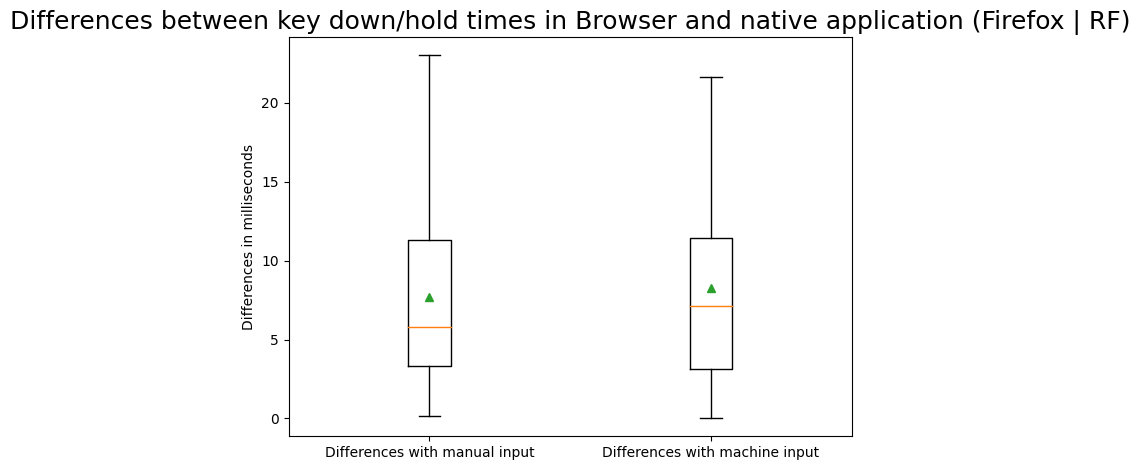

In [12]:
# firefox resistFingerprinting
firefox = pd.read_csv("./firefox_resistF/complete.csv")
firefox_diffs = get_keydown_time_differences(firefox)
calc(firefox_diffs)
firefox_diffs_manual = firefox_diffs[0]
firefox_diffs_machine = firefox_diffs[1]

# plot firefox
plt.boxplot([firefox_diffs_manual, firefox_diffs_machine], labels=["Differences with manual input",
            "Differences with machine input"], showfliers=False, showmeans=True)
plt.title("Differences between key down/hold times in Browser and native application (Firefox | RF)", fontsize=18)
#plt.xticks(fontsize=18)
plt.xlabel("", )#fontsize=18)
plt.ylabel("Differences in milliseconds", )#fontsize=18)
plt.tight_layout()
plt.savefig("./firefox_resistF/fig_holdtime.jpeg", bbox_inches="tight", pad_inches=0.3)
plt.show()

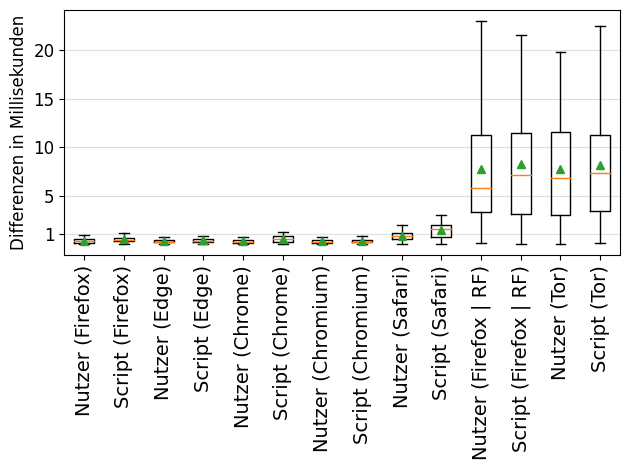

In [17]:
# Combine

firefox = pd.read_csv("./firefox/complete.csv")
firefox_diffs = get_keydown_time_differences(firefox)
firefox_diffs_manual = firefox_diffs[0]
firefox_diffs_machine = firefox_diffs[1]

firefox_resist = pd.read_csv("./firefox_resistF/complete.csv")
firefox_diffs_resist = get_keydown_time_differences(firefox_resist)
firefox_diffs_manual_resist = firefox_diffs_resist[0]
firefox_diffs_machine_resist = firefox_diffs_resist[1]

edge = pd.read_csv("./edge/complete.csv")
edge_diffs = get_keydown_time_differences(edge)
edge_diffs_manual = edge_diffs[0]
edge_diffs_machine = edge_diffs[1] 

chrome = pd.read_csv("./chrome/complete.csv")
chrome_diffs = get_keydown_time_differences(chrome)
chrome_diffs_manual = chrome_diffs[0]
chrome_diffs_machine = chrome_diffs[1]

chromium = pd.read_csv("./chromium/complete.csv")
chromium_diffs = get_keydown_time_differences(chromium)
chromium_diffs_manual = chromium_diffs[0]
chromium_diffs_machine = chromium_diffs[1]

tor = pd.read_csv("./tor/complete.csv")
tor_diffs = get_keydown_time_differences(tor)
tor_diffs_manual = tor_diffs[0]
tor_diffs_machine = tor_diffs[1]

safari2 = pd.read_csv("./safari2/complete.csv")
safari2_diffs = get_keydown_time_differences(safari2)
safari2_diffs_manual = safari2_diffs[0]
safari2_diffs_machine = safari2_diffs[1]
                                                                     
safari3 = pd.read_csv("./safari3/complete.csv")
safari3_diffs = get_keydown_time_differences(safari3)
safari3_diffs_manual = safari3_diffs[0]
safari3_diffs_machine = safari3_diffs[1]


# plot
plt.boxplot([
    firefox_diffs_manual,firefox_diffs_machine,
    edge_diffs_manual,edge_diffs_machine,
    chrome_diffs_manual,chrome_diffs_machine,
    chromium_diffs_manual,chromium_diffs_machine,
    #safari_diffs_manual, safari_diffs_machine,
    #safari2_diffs_manual, safari2_diffs_machine,
    safari3_diffs_manual, safari3_diffs_machine,
    firefox_diffs_manual_resist,firefox_diffs_machine_resist,
    tor_diffs_manual, tor_diffs_machine,
    ], labels=[
    "Nutzer (Firefox)", "Script (Firefox)",
    "Nutzer (Edge)", "Script (Edge)",
    "Nutzer (Chrome)", "Script (Chrome)",
    "Nutzer (Chromium)", "Script (Chromium)",
    #"Nutzer Eingabe (Safari)", #"Script Eingabe (Safari)",
    #"Manual Eingabe (Safari 2)", "Script Eingabe (Safari 2)",
    "Nutzer (Safari)", "Script (Safari)",
    "Nutzer (Firefox | RF)", "Script (Firefox | RF)",
    "Nutzer (Tor)", "Script (Tor)",
    ], showfliers=False, showmeans=True)
#plt.title("Differenzen zwischen Tasten-Haltedauer in Browsern und nativer Anwendung", )#fontsize=22)
plt.xticks(rotation=90,fontsize=14, )
plt.yticks(fontsize=12, ticks=[1, 5, 10, 15, 20])
plt.xlabel("", fontsize=18)
plt.ylabel("Differenzen in Millisekunden", fontsize=12)
plt.grid(alpha=0.4,axis = 'y' )
plt.tight_layout()
plt.savefig("./fig_holdtime.jpeg", )#bbox_inches="tight", pad_inches=0.3)
plt.show()

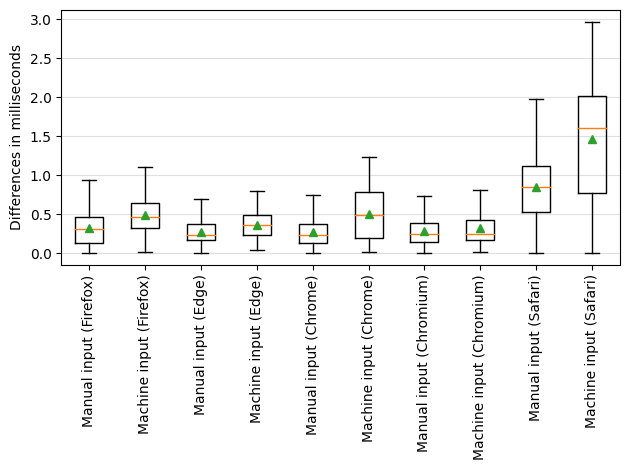

In [14]:
# plot
plt.boxplot([
    firefox_diffs_manual,firefox_diffs_machine,
    #firefox_diffs_manual_resist,firefox_diffs_machine_resist,
    edge_diffs_manual,edge_diffs_machine,
    chrome_diffs_manual,chrome_diffs_machine,
    chromium_diffs_manual,chromium_diffs_machine,
    #tor_diffs_manual, tor_diffs_machine,
    #safari2_diffs_manual, safari2_diffs_machine,
    safari3_diffs_manual, safari3_diffs_machine,
    ], labels=[
    "Manual input (Firefox)", "Machine input (Firefox)",
    #"Manual input (Firefox | RF)", "Machine input (Firefox | RF)",
    "Manual input (Edge)", "Machine input (Edge)",
    "Manual input (Chrome)", "Machine input (Chrome)",
    "Manual input (Chromium)", "Machine input (Chromium)",
    #"Manual input (Tor)", "Machine input (Tor)",
    #"Manual input (Safari 2)", "Machine input (Safari 2)",
    "Manual input (Safari)", "Machine input (Safari)",
    ], showfliers=False, showmeans=True)
#plt.title("Differences between key down/hold times in Browser and native application", fontsize=22)
plt.xticks(rotation=90)#,fontsize=18)
plt.xlabel("", )#fontsize=18)
plt.ylabel("Differences in milliseconds", )#fontsize=18)
plt.grid(alpha=0.4,axis = 'y' )
plt.tight_layout()
plt.savefig("./fig2_holdtime.jpeg", bbox_inches="tight", pad_inches=0.3)
plt.show()